# Data Science Salary Predictor

# Data Cleaning

In this first step, we will proceed to upload, clean and get the data collected ready for the upcoming steps *(EDA, Machine learning model, and web app)*

In [78]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


pd.options.mode.chained_assignment = None 
stopWords = set(stopwords.words('english'))


#Set Display option to check full table: (Uncomment below line to activate)
#pd.set_option("display.max_rows", None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oussama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#loading Indeed scraped data
indeed_df = pd.read_csv('DS_Jobs_indeed.csv')
indeed_df.head(7)

,Unnamed: 0,title,company,location(s),salary,summary
0,0,newData Science Educator,RStudio,"Seattle, WA•Remote",NaN,"Enterprise data science, including the basics ..."
1,1,Data Scientist II,Amazon.com Services LLC,+126 locationsRemote,"$119,300 - $160,000 a year",You will collaborate closely as part of a blen...
2,2,Virtual Bilingual Machine Learning Data Associ...,Amazon.com Services LLC,+126 locationsRemote,NaN,Practical knowledge of data processing needs a...
3,3,newData Scientist,Procter & Gamble,"Cincinnati, OH 45201 (Central Business Distric...",NaN,This role has a unique ability to use the powe...
4,4,newJR. DATA SCIENTIST,ViacomCBS,"New York, NY 10036 (Midtown area)",NaN,Experience working with production data scienc...
5,5,Data Analyst - Tiktok Ads,TikTok,"Seattle, WA+2 locations",NaN,Expert experience pulling large and complex da...
6,6,newMathematician,National Security Agency,"Fort Meade, MD","$73,076 - $91,057 a year",The defense prevents adversaries from gaining ...


In [24]:
#Checking Indeed's data
indeed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   900 non-null    int64 
 1   title        900 non-null    object
 2   company      900 non-null    object
 3   location(s)  900 non-null    object
 4   salary       144 non-null    object
 5   summary      900 non-null    object
dtypes: int64(1), object(5)
memory usage: 42.3+ KB


In [25]:
#Indeed data cleaning
indeed_df.dropna(subset = ['salary'], inplace = True)
print(indeed_df.info())
indeed_df.head(7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 898
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   144 non-null    int64 
 1   title        144 non-null    object
 2   company      144 non-null    object
 3   location(s)  144 non-null    object
 4   salary       144 non-null    object
 5   summary      144 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.9+ KB
None


,Unnamed: 0,title,company,location(s),salary,summary
1,1,Data Scientist II,Amazon.com Services LLC,+126 locationsRemote,"$119,300 - $160,000 a year",You will collaborate closely as part of a blen...
6,6,newMathematician,National Security Agency,"Fort Meade, MD","$73,076 - $91,057 a year",The defense prevents adversaries from gaining ...
9,9,"Analyst I/II, Data Science (remote)",Liberty Mutual Insurance,+1 locationRemote,"$85,100 - $138,900 a year",Regularly engage with the data science communi...
12,12,newData Engineer - 100% Remote,Piper Companies,+3 locationsRemote,"$100,000 - $180,000 a year",Healthcare data and HIPAA data experience.Load...
13,13,"Front End Engineer, MADS- Measurement and Data...",Amazon.com Services LLC,"Boulder, CO+5 locations","$93,800 a year",Professional non-internship experience with fr...
15,15,Data Scientist,National Security Agency,"Fort Meade, MD+1 location","$103,690 - $159,286 a year",Candidates for the NSA's Data Scientist roles ...
16,16,"Director I, Data Science",Liberty Mutual Insurance,+8 locationsRemote,"$125,600 - $179,500 a year",Regularly engages with data science community ...


In [26]:
indeed_df['Data Source'] = 'Indeed'
indeed_df['Salary Estimate_Source'] = 'Indeed Salary Estimates'
indeed_df.rename(columns = {'title':'Job Title','company':'Company Name', 'location(s)':'Location', 'salary':'Salary Estimate', 'summary':'Job Description'}, inplace = True)
indeed_df = indeed_df.iloc[:,1:]
indeed_df.head()

,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source
1,Data Scientist II,Amazon.com Services LLC,+126 locationsRemote,"$119,300 - $160,000 a year",You will collaborate closely as part of a blen...,Indeed,Indeed Salary Estimates
6,newMathematician,National Security Agency,"Fort Meade, MD","$73,076 - $91,057 a year",The defense prevents adversaries from gaining ...,Indeed,Indeed Salary Estimates
9,"Analyst I/II, Data Science (remote)",Liberty Mutual Insurance,+1 locationRemote,"$85,100 - $138,900 a year",Regularly engage with the data science communi...,Indeed,Indeed Salary Estimates
12,newData Engineer - 100% Remote,Piper Companies,+3 locationsRemote,"$100,000 - $180,000 a year",Healthcare data and HIPAA data experience.Load...,Indeed,Indeed Salary Estimates
13,"Front End Engineer, MADS- Measurement and Data...",Amazon.com Services LLC,"Boulder, CO+5 locations","$93,800 a year",Professional non-internship experience with fr...,Indeed,Indeed Salary Estimates


In [27]:
#loading Glassdoor scraped data:
glassdoor_df = pd.read_csv('DataScience_Jobs_Glassdoor.csv')
print(glassdoor_df.info())
glassdoor_df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       900 non-null    int64  
 1   Job Title        900 non-null    object 
 2   Salary Estimate  900 non-null    object 
 3   Job Description  900 non-null    object 
 4   Rating           900 non-null    float64
 5   Company Name     900 non-null    object 
 6   Location         900 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 49.3+ KB
None


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location
0,0,Data Scientist,$80K - $148K (Glassdoor est.),"As a Data Scientist, you will provide consumer...",-1.0,T-Mobile,"Bellevue, WA"
1,1,Senior Data Science Engineer |LATAM|,$70K - $131K (Glassdoor est.),BairesDev is proud to be one of the fastest-gr...,4.3,BairesDev\n4.3,"Colon, PA"
2,2,Data Analyst,Employer Provided Salary:$30 - $70 Per Hour,ABOUT THE ROLE\nTYPICAL ACCOUNTABILITIES\nThe ...,-1.0,N1 Solutions,"Kansas, IL"
3,3,Senior Data Analyst,Employer Provided Salary:$110K - $130K,"A leading, high-traffic online marketplace is ...",4.8,Strategic Employment Partners\n4.8,Remote
4,4,Data science,Employer Provided Salary:$65K - $75K,Job role: Data Science\nNote: Don't apply for ...,-1.0,Dataquestcorp,"Branchburg, NJ"
5,5,Junior Data Scientist Apprentice,$80K - $174K (Glassdoor est.),Introduction\nAs a Junior Data Scientist at IB...,4.0,IBM\n4.0,"San Jose, CA"
6,6,Data Science Engineer,Employer Provided Salary:$85K - $95K,Data Science Engineer\nM-Tech Systems is a sta...,3.6,M-Tech Systems USA\n3.6,Remote


In [28]:
#checking salary estimates data of Glassdoor
glassdoor_df['Salary Estimate'].value_counts()

-1                                        149
Employer Provided Salary:$125K - $175K      9
$82K - $154K (Glassdoor est.)               7
Employer Provided Salary:$41K - $135K       4
$63K - $122K (Glassdoor est.)               4
                                         ... 
$92K - $159K (Glassdoor est.)               1
$61K - $104K (Glassdoor est.)               1
$107K - $206K (Glassdoor est.)              1
Employer Provided Salary:$70K - $73K        1
$84K - $139K (Glassdoor est.)               1
Name: Salary Estimate, Length: 649, dtype: int64

In [29]:
#Glassdoor data cleaning 
glassdoor_df = glassdoor_df[glassdoor_df['Salary Estimate'] != '-1']
glassdoor_df['Salary Estimate_Source'] = glassdoor_df['Salary Estimate'].apply(lambda x: 'Employer Salary' if 'Employer' in x else 'Glassdoor Estimate')
glassdoor_df['Data Source'] = 'Glassdoor'
glassdoor_df['Company Name'] = glassdoor_df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'].split('\n')[0], axis = 1)
glassdoor_df = glassdoor_df.iloc[:,1:]
glassdoor_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Salary Estimate_Source,Data Source
0,Data Scientist,$80K - $148K (Glassdoor est.),"As a Data Scientist, you will provide consumer...",-1.0,T-Mobile,"Bellevue, WA",Glassdoor Estimate,Glassdoor
1,Senior Data Science Engineer |LATAM|,$70K - $131K (Glassdoor est.),BairesDev is proud to be one of the fastest-gr...,4.3,BairesDev,"Colon, PA",Glassdoor Estimate,Glassdoor
2,Data Analyst,Employer Provided Salary:$30 - $70 Per Hour,ABOUT THE ROLE\nTYPICAL ACCOUNTABILITIES\nThe ...,-1.0,N1 Solutions,"Kansas, IL",Employer Salary,Glassdoor
3,Senior Data Analyst,Employer Provided Salary:$110K - $130K,"A leading, high-traffic online marketplace is ...",4.8,Strategic Employment Partners,Remote,Employer Salary,Glassdoor
4,Data science,Employer Provided Salary:$65K - $75K,Job role: Data Science\nNote: Don't apply for ...,-1.0,Dataquestcorp,"Branchburg, NJ",Employer Salary,Glassdoor


In [30]:
glassdoor_df = glassdoor_df.drop(columns = ['Rating'])

In [31]:
#Checking companies within the data set
glassdoor_df['Company Name'].value_counts()

PepsiCo                     10
Info Origin Inc              9
Deloitte                     7
GroupM Services              6
T-Mobile                     5
                            ..
Concentrix                   1
Sonalysts, Inc.              1
Majestic Steel USA, Inc.     1
Adams County Colorado        1
Insight Policy Research      1
Name: Company Name, Length: 623, dtype: int64

In [32]:
#Merging Glassdoor & Indeed's data
df = pd.concat([indeed_df, glassdoor_df] , ignore_index=True)
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job Title               895 non-null    object
 1   Company Name            895 non-null    object
 2   Location                895 non-null    object
 3   Salary Estimate         895 non-null    object
 4   Job Description         895 non-null    object
 5   Data Source             895 non-null    object
 6   Salary Estimate_Source  895 non-null    object
dtypes: object(7)
memory usage: 49.1+ KB
None


,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source
0,Data Scientist II,Amazon.com Services LLC,+126 locationsRemote,"$119,300 - $160,000 a year",You will collaborate closely as part of a blen...,Indeed,Indeed Salary Estimates
1,newMathematician,National Security Agency,"Fort Meade, MD","$73,076 - $91,057 a year",The defense prevents adversaries from gaining ...,Indeed,Indeed Salary Estimates
2,"Analyst I/II, Data Science (remote)",Liberty Mutual Insurance,+1 locationRemote,"$85,100 - $138,900 a year",Regularly engage with the data science communi...,Indeed,Indeed Salary Estimates
3,newData Engineer - 100% Remote,Piper Companies,+3 locationsRemote,"$100,000 - $180,000 a year",Healthcare data and HIPAA data experience.Load...,Indeed,Indeed Salary Estimates
4,"Front End Engineer, MADS- Measurement and Data...",Amazon.com Services LLC,"Boulder, CO+5 locations","$93,800 a year",Professional non-internship experience with fr...,Indeed,Indeed Salary Estimates
5,Data Scientist,National Security Agency,"Fort Meade, MD+1 location","$103,690 - $159,286 a year",Candidates for the NSA's Data Scientist roles ...,Indeed,Indeed Salary Estimates
6,"Director I, Data Science",Liberty Mutual Insurance,+8 locationsRemote,"$125,600 - $179,500 a year",Regularly engages with data science community ...,Indeed,Indeed Salary Estimates
7,"Data Scientist, Operations Data Science",Google,"Mountain View, CA+6 locations•Remote work avai...","$95,000 a year","At Google, data drives all of our decision-mak...",Indeed,Indeed Salary Estimates
8,Junior Data Science Engineer - Evernorth,Cigna,"Hartford, CT 06152 (Frog Hollow area)+5 locations","$82,200 - $137,000 a year",Building and optimizing ‘big data’ data pipeli...,Indeed,Indeed Salary Estimates
9,newData Analytics Specialist,California State University,"Pomona, CA","$3,288 - $4,308 a month","Type of Appointment: Full-time, Temporary for ...",Indeed,Indeed Salary Estimates


In [33]:
# Lowering and removing punctuation
def processing(df):
    df['Job Title'] = df['Job Title'].apply(lambda x: ' '.join(x.split()))
    df['Job Title'] =df['Job Title'].str.lstrip('new')
    df['Job Title'] =df['Job Title'].str.rstrip('-*')
    df['Job Title'] =df['Job Title'].apply(lambda x: re.sub(r'[^\w\s]',' ', x.lower()))
    df['Job Title'] =df['Job Title'][df['Job Title'].str.contains('data|machine|learning|intelligence|analyst')]
    df['Salary Estimate'] = df['Salary Estimate'].str.lower()
    df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join(x.split()))
    df['Job Description'] = df['Job Description'].apply(lambda x: re.sub(r'[^\w\s]','', x.lower()))
    df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))                                            
    return(df)

df = processing(df)

df.head()

,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source
0,data scientist ii,Amazon.com Services LLC,+126 locationsRemote,"$119,300 - $160,000 a year",collaborate closely part blended sciencebased ...,Indeed,Indeed Salary Estimates
1,NaN,National Security Agency,"Fort Meade, MD","$73,076 - $91,057 a year",defense prevents adversaries gaining access se...,Indeed,Indeed Salary Estimates
2,analyst i ii data science remote,Liberty Mutual Insurance,+1 locationRemote,"$85,100 - $138,900 a year",regularly engage data science community partic...,Indeed,Indeed Salary Estimates
3,data engineer 100 remote,Piper Companies,+3 locationsRemote,"$100,000 - $180,000 a year",healthcare data hipaa data experienceload data...,Indeed,Indeed Salary Estimates
4,front end engineer mads measurement and data...,Amazon.com Services LLC,"Boulder, CO+5 locations","$93,800 a year",professional noninternship experience front en...,Indeed,Indeed Salary Estimates


In [34]:
df.dropna(subset = ['Job Title'], inplace = True)
df.head()

,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source
0,data scientist ii,Amazon.com Services LLC,+126 locationsRemote,"$119,300 - $160,000 a year",collaborate closely part blended sciencebased ...,Indeed,Indeed Salary Estimates
2,analyst i ii data science remote,Liberty Mutual Insurance,+1 locationRemote,"$85,100 - $138,900 a year",regularly engage data science community partic...,Indeed,Indeed Salary Estimates
3,data engineer 100 remote,Piper Companies,+3 locationsRemote,"$100,000 - $180,000 a year",healthcare data hipaa data experienceload data...,Indeed,Indeed Salary Estimates
4,front end engineer mads measurement and data...,Amazon.com Services LLC,"Boulder, CO+5 locations","$93,800 a year",professional noninternship experience front en...,Indeed,Indeed Salary Estimates
5,data scientist,National Security Agency,"Fort Meade, MD+1 location","$103,690 - $159,286 a year",candidates nsas data scientist roles asked com...,Indeed,Indeed Salary Estimates


In [35]:
#simplifing job titles to specific categories:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other data science related jobs'
    
df['Job'] = df['Job Title'].apply(title_simplifier)

df.head()

,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source,Job
0,data scientist ii,Amazon.com Services LLC,+126 locationsRemote,"$119,300 - $160,000 a year",collaborate closely part blended sciencebased ...,Indeed,Indeed Salary Estimates,data scientist
2,analyst i ii data science remote,Liberty Mutual Insurance,+1 locationRemote,"$85,100 - $138,900 a year",regularly engage data science community partic...,Indeed,Indeed Salary Estimates,data analyst
3,data engineer 100 remote,Piper Companies,+3 locationsRemote,"$100,000 - $180,000 a year",healthcare data hipaa data experienceload data...,Indeed,Indeed Salary Estimates,data engineer
4,front end engineer mads measurement and data...,Amazon.com Services LLC,"Boulder, CO+5 locations","$93,800 a year",professional noninternship experience front en...,Indeed,Indeed Salary Estimates,other data science related jobs
5,data scientist,National Security Agency,"Fort Meade, MD+1 location","$103,690 - $159,286 a year",candidates nsas data scientist roles asked com...,Indeed,Indeed Salary Estimates,data scientist


In [36]:
#simplifing seniority titles to few specific categories:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'vp' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower()or 'experienced' in title.lower() or 'iii' in title.lower() or 'research' in title.lower() or 'manager' in title.lower():
        return 'Senior'
    elif 'intermediate' in title.lower() or 'staff' in title.lower() or 'ii' in title.lower():
        return 'Mid'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'intern' in title.lower() or 'student' in title.lower() or 'entry' in title.lower() or 'associate' in title.lower():
        return 'Junior'
    else:
        return 'Not Specified'
    
df['Seniority'] = df['Job Title'].apply(seniority)
df.head()

,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source,Job,Seniority
0,data scientist ii,Amazon.com Services LLC,+126 locationsRemote,"$119,300 - $160,000 a year",collaborate closely part blended sciencebased ...,Indeed,Indeed Salary Estimates,data scientist,Mid
2,analyst i ii data science remote,Liberty Mutual Insurance,+1 locationRemote,"$85,100 - $138,900 a year",regularly engage data science community partic...,Indeed,Indeed Salary Estimates,data analyst,Mid
3,data engineer 100 remote,Piper Companies,+3 locationsRemote,"$100,000 - $180,000 a year",healthcare data hipaa data experienceload data...,Indeed,Indeed Salary Estimates,data engineer,Not Specified
4,front end engineer mads measurement and data...,Amazon.com Services LLC,"Boulder, CO+5 locations","$93,800 a year",professional noninternship experience front en...,Indeed,Indeed Salary Estimates,other data science related jobs,Not Specified
5,data scientist,National Security Agency,"Fort Meade, MD+1 location","$103,690 - $159,286 a year",candidates nsas data scientist roles asked com...,Indeed,Indeed Salary Estimates,data scientist,Not Specified


In [37]:
#standarizing location data
df['Location'] = df['Location'].apply(lambda x: 'Remote' if 'remote' in x.lower() else x)
df['Location'] = df['Location'].apply(lambda x: 'Remote' if '+' in x.lower() else x)
df['City'] = df['Location'].apply(lambda x: x.split(',')[0] if ',' in x.lower() else x)
df['State'] = df['Location'].apply(lambda x: x.split(',')[1] if ',' in x.lower() else x) 
    
df.head()

,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source,Job,Seniority,City,State
0,data scientist ii,Amazon.com Services LLC,Remote,"$119,300 - $160,000 a year",collaborate closely part blended sciencebased ...,Indeed,Indeed Salary Estimates,data scientist,Mid,Remote,Remote
2,analyst i ii data science remote,Liberty Mutual Insurance,Remote,"$85,100 - $138,900 a year",regularly engage data science community partic...,Indeed,Indeed Salary Estimates,data analyst,Mid,Remote,Remote
3,data engineer 100 remote,Piper Companies,Remote,"$100,000 - $180,000 a year",healthcare data hipaa data experienceload data...,Indeed,Indeed Salary Estimates,data engineer,Not Specified,Remote,Remote
4,front end engineer mads measurement and data...,Amazon.com Services LLC,Remote,"$93,800 a year",professional noninternship experience front en...,Indeed,Indeed Salary Estimates,other data science related jobs,Not Specified,Remote,Remote
5,data scientist,National Security Agency,Remote,"$103,690 - $159,286 a year",candidates nsas data scientist roles asked com...,Indeed,Indeed Salary Estimates,data scientist,Not Specified,Remote,Remote


In [38]:
#checking if any missing/wrong states still:
df.State

0      Remote
2      Remote
3      Remote
4      Remote
5      Remote
        ...  
890        ID
891        TX
892        NY
893        WA
894        VA
Name: State, Length: 880, dtype: object

In [39]:
#fixing wrong states:
for i, r in df.State.iteritems():
    if r == 'United States':
        df['State'][i] = 'Remote'
    elif r == 'California':
        df['State'][i] = 'CA'
    elif r == 'Tennessee':
        df['State'][i] = 'TN'
    elif r == 'Georgia':
        df['State'][i] = 'GA'

for index, row in df.State.iteritems():
    if row != 'Remote':
        df['State'][index] = df['State'][index][:3]

In [40]:
#Separate Salary Data (Min & Max) and Transform in manipulatable float data points
df['Salary Estimates'] = df['Salary Estimate'].apply(lambda x: x.replace(' an hour', '').replace(' a month ', '').replace('k','000').replace('$','').replace(',','').replace('(glassdoor est.)','').replace('employer provided salary:','').replace('from ','').replace('per hour','').replace('a year','').replace('a month',''))
df['Salary Estimates'] = df['Salary Estimates'].str.strip()
df['min_salary'] = df['Salary Estimates'].apply(lambda x: float(x.split('-')[0]))

df.test = [i for i in df['Salary Estimates'].apply(lambda x: x.split('-'))]
df.test = pd.DataFrame(df.test, dtype =float, columns =['1','2'])
maximum = []
for row in df.test.itertuples():
    highestval = max(row)
    maximum.append(highestval)
maxdf = pd.DataFrame(maximum)
df['max_salary'] = maxdf.values


#Calculate and extract yearly Salary from the Monthly & Hourly Salary data points
df['Salary Type_initial'] ='initial'
for index, row in df.min_salary.iteritems():
    if row < 100:
        df['Salary Type_initial'][index] = 'hourly'
    elif  100 < row <= 15000:
        df['Salary Type_initial'][index] = 'monthly'
    else:
        df['Salary Type_initial'][index] = 'yearly'
        
df['Salary Type_final'] = 'yearly'

for i, j in df['Salary Type_initial'].iteritems():
    if j == 'hourly':
        df['min_salary'][i] = df['min_salary'][i]*(40*52)
        df['max_salary'][i] = df['max_salary'][i]*(40*52)
        df['Salary Type_final'][i] = 'yearly'
    elif j == 'monthly':
        df['min_salary'][i] = df['min_salary'][i]*(12)
        df['max_salary'][i] = df['max_salary'][i]*(12)
        df['Salary Type_final'][i] = 'yearly'
    else:
        df['min_salary'][i] = df['min_salary'][i]
        df['max_salary'][i] = df['max_salary'][i]
        df['Salary Type_final'][i] = df['Salary Type_initial'][i]
        
        
#Add Average Salary Data:
df['avg_salary'] = (df.min_salary+df.max_salary)/2

C:\Users\Oussama\AppData\Local\Temp\ipykernel_19092\853000716.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.test = [i for i in df['Salary Estimates'].apply(lambda x: x.split('-'))]


In [41]:
#Visualize the data
df

,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source,Job,Seniority,City,State,Salary Estimates,min_salary,max_salary,Salary Type_initial,Salary Type_final,avg_salary
0,data scientist ii,Amazon.com Services LLC,Remote,"$119,300 - $160,000 a year",collaborate closely part blended sciencebased ...,Indeed,Indeed Salary Estimates,data scientist,Mid,Remote,Remote,119300 - 160000,119300.0,160000.0,yearly,yearly,139650.0
2,analyst i ii data science remote,Liberty Mutual Insurance,Remote,"$85,100 - $138,900 a year",regularly engage data science community partic...,Indeed,Indeed Salary Estimates,data analyst,Mid,Remote,Remote,85100 - 138900,85100.0,138900.0,yearly,yearly,112000.0
3,data engineer 100 remote,Piper Companies,Remote,"$100,000 - $180,000 a year",healthcare data hipaa data experienceload data...,Indeed,Indeed Salary Estimates,data engineer,Not Specified,Remote,Remote,100000 - 180000,100000.0,180000.0,yearly,yearly,140000.0
4,front end engineer mads measurement and data...,Amazon.com Services LLC,Remote,"$93,800 a year",professional noninternship experience front en...,Indeed,Indeed Salary Estimates,other data science related jobs,Not Specified,Remote,Remote,93800,93800.0,93800.0,yearly,yearly,93800.0
5,data scientist,National Security Agency,Remote,"$103,690 - $159,286 a year",candidates nsas data scientist roles asked com...,Indeed,Indeed Salary Estimates,data scientist,Not Specified,Remote,Remote,103690 - 159286,103690.0,159286.0,yearly,yearly,131488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,manager data science,VisitPay,"Boise, ID",$64k - $128k (glassdoor est.),reports director decision science analytics de...,Glassdoor,Glassdoor Estimate,manager,Senior,Boise,ID,64000 - 128000,64000.0,128000.0,yearly,yearly,96000.0
891,data analyst,Health & Human Services Comm,"Austin, TX",employer provided salary:$40k - $64k,hhsc seeking data analyst join interdisciplina...,Glassdoor,Employer Salary,data analyst,Not Specified,Austin,TX,40000 - 64000,40000.0,64000.0,yearly,yearly,52000.0
892,data scientist,Flipped.ai,"New York, NY",employer provided salary:$100k - $218k,data scientists positions located new york and...,Glassdoor,Employer Salary,data scientist,Not Specified,New York,NY,100000 - 218000,100000.0,218000.0,yearly,yearly,159000.0
893,data scientist,ArenaNet,"Bellevue, WA",$84k - $139k (glassdoor est.),data scientist ncsoft youll responsible helpin...,Glassdoor,Glassdoor Estimate,data scientist,Not Specified,Bellevue,WA,84000 - 139000,84000.0,139000.0,yearly,yearly,111500.0


In [42]:
#Further state cleaning
df['State']= df['State'].str.strip()
df['State'].value_counts()

CA        145
Remote    128
NY         96
TX         46
IL         41
GA         40
DC         37
WA         36
MA         30
FL         24
MI         23
MD         23
VA         22
NJ         22
NC         21
CO         20
OR         13
PA         13
UT         12
MN         11
OH         10
AZ          7
MO          6
NE          6
DE          5
TN          4
AL          4
WI          4
IN          4
NH          3
KY          3
CT          3
AR          2
SC          2
NM          2
LA          2
HI          2
KS          2
ND          1
RI          1
NV          1
IA          1
OK          1
ID          1
Name: State, dtype: int64

In [43]:
#checking available salary data points:
df[['Salary Estimates','min_salary','max_salary','avg_salary','Salary Type_initial', 'Salary Type_final']]

,Salary Estimates,min_salary,max_salary,avg_salary,Salary Type_initial,Salary Type_final
0,119300 - 160000,119300.0,160000.0,139650.0,yearly,yearly
2,85100 - 138900,85100.0,138900.0,112000.0,yearly,yearly
3,100000 - 180000,100000.0,180000.0,140000.0,yearly,yearly
4,93800,93800.0,93800.0,93800.0,yearly,yearly
5,103690 - 159286,103690.0,159286.0,131488.0,yearly,yearly
...,...,...,...,...,...,...
890,64000 - 128000,64000.0,128000.0,96000.0,yearly,yearly
891,40000 - 64000,40000.0,64000.0,52000.0,yearly,yearly
892,100000 - 218000,100000.0,218000.0,159000.0,yearly,yearly
893,84000 - 139000,84000.0,139000.0,111500.0,yearly,yearly


In [44]:
#Screen for specific mentioned skills (i.e. SQL, Python, Docker, AWS, etc.)
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['R'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0) 
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['GCP'] = df['Job Description'].apply(lambda x: 1 if 'google cloud' in x.lower() or 'gcp' in x.lower() else 0)
df['Azure'] = df['Job Description'].apply(lambda x: 1 if 'microsoft azure' in x.lower() or 'azure' in x.lower() else 0)
df['Docker'] = df['Job Description'].apply(lambda x: 1 if 'docker' in x.lower() else 0)
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['Airflow'] = df['Job Description'].apply(lambda x: 1 if 'airflow' in x.lower() else 0)
df['PyTorch'] = df['Job Description'].apply(lambda x: 1 if 'pytorch' in x.lower() else 0)
df['TensorFlow'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() else 0)
df['Keras'] = df['Job Description'].apply(lambda x: 1 if 'keras' in x.lower() else 0)
df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df['Power BI'] = df['Job Description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

df

,Job Title,Company Name,Location,Salary Estimate,Job Description,Data Source,Salary Estimate_Source,Job,Seniority,City,...,Azure,Docker,Spark,Airflow,PyTorch,TensorFlow,Keras,Tableau,Power BI,Excel
0,data scientist ii,Amazon.com Services LLC,Remote,"$119,300 - $160,000 a year",collaborate closely part blended sciencebased ...,Indeed,Indeed Salary Estimates,data scientist,Mid,Remote,...,0,0,0,0,0,0,0,0,0,0
2,analyst i ii data science remote,Liberty Mutual Insurance,Remote,"$85,100 - $138,900 a year",regularly engage data science community partic...,Indeed,Indeed Salary Estimates,data analyst,Mid,Remote,...,0,0,0,0,0,0,0,0,0,0
3,data engineer 100 remote,Piper Companies,Remote,"$100,000 - $180,000 a year",healthcare data hipaa data experienceload data...,Indeed,Indeed Salary Estimates,data engineer,Not Specified,Remote,...,0,0,0,0,0,0,0,0,0,0
4,front end engineer mads measurement and data...,Amazon.com Services LLC,Remote,"$93,800 a year",professional noninternship experience front en...,Indeed,Indeed Salary Estimates,other data science related jobs,Not Specified,Remote,...,0,0,0,0,0,0,0,0,0,0
5,data scientist,National Security Agency,Remote,"$103,690 - $159,286 a year",candidates nsas data scientist roles asked com...,Indeed,Indeed Salary Estimates,data scientist,Not Specified,Remote,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,manager data science,VisitPay,"Boise, ID",$64k - $128k (glassdoor est.),reports director decision science analytics de...,Glassdoor,Glassdoor Estimate,manager,Senior,Boise,...,0,0,0,0,0,0,0,0,0,0
891,data analyst,Health & Human Services Comm,"Austin, TX",employer provided salary:$40k - $64k,hhsc seeking data analyst join interdisciplina...,Glassdoor,Employer Salary,data analyst,Not Specified,Austin,...,0,0,0,0,0,0,0,0,0,0
892,data scientist,Flipped.ai,"New York, NY",employer provided salary:$100k - $218k,data scientists positions located new york and...,Glassdoor,Employer Salary,data scientist,Not Specified,New York,...,0,0,0,0,0,0,0,0,0,0
893,data scientist,ArenaNet,"Bellevue, WA",$84k - $139k (glassdoor est.),data scientist ncsoft youll responsible helpin...,Glassdoor,Glassdoor Estimate,data scientist,Not Specified,Bellevue,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#counting each skill
#df[['Python', 'R','SQL','AWS','GCP','Azure','Docker','Spark','Airflow','PyTorch','TensorFlow','Keras','Tableau','Power BI', 'Excel']].value_counts()

## EDA

In [46]:
#checking the dataframe
df.describe()

,min_salary,max_salary,avg_salary,Python,R,SQL,AWS,GCP,Azure,Docker,Spark,Airflow,PyTorch,TensorFlow,Keras,Tableau,Power BI,Excel
count,880.000000,8.800000e+02,880.000000,880.000000,880.0,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.0,880.000000,880.000000,880.000000
mean,77810.711364,1.598265e+05,118818.605114,0.088636,0.0,0.071591,0.030682,0.003409,0.012500,0.002273,0.017045,0.001136,0.001136,0.001136,0.0,0.030682,0.009091,0.096591
std,28632.400633,1.828526e+05,97066.399395,0.284380,0.0,0.257956,0.172552,0.058321,0.111166,0.047646,0.129514,0.033710,0.033710,0.033710,0.0,0.172552,0.094966,0.295568
min,100.000000,1.810000e+02,140.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,60000.000000,1.040000e+05,83500.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,72000.000000,1.290000e+05,100500.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,88000.000000,1.550000e+05,122075.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,240000.000000,1.778400e+06,951600.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [47]:
df['Job'].value_counts()

data scientist                     449
data analyst                       210
other data science related jobs     98
data engineer                       70
manager                             38
director                            11
machine learning engineer            4
Name: Job, dtype: int64

[Text(0, 0, '449'),
 Text(0, 0, '210'),
 Text(0, 0, '98'),
 Text(0, 0, '70'),
 Text(0, 0, '38'),
 Text(0, 0, '11'),
 Text(0, 0, '4')]

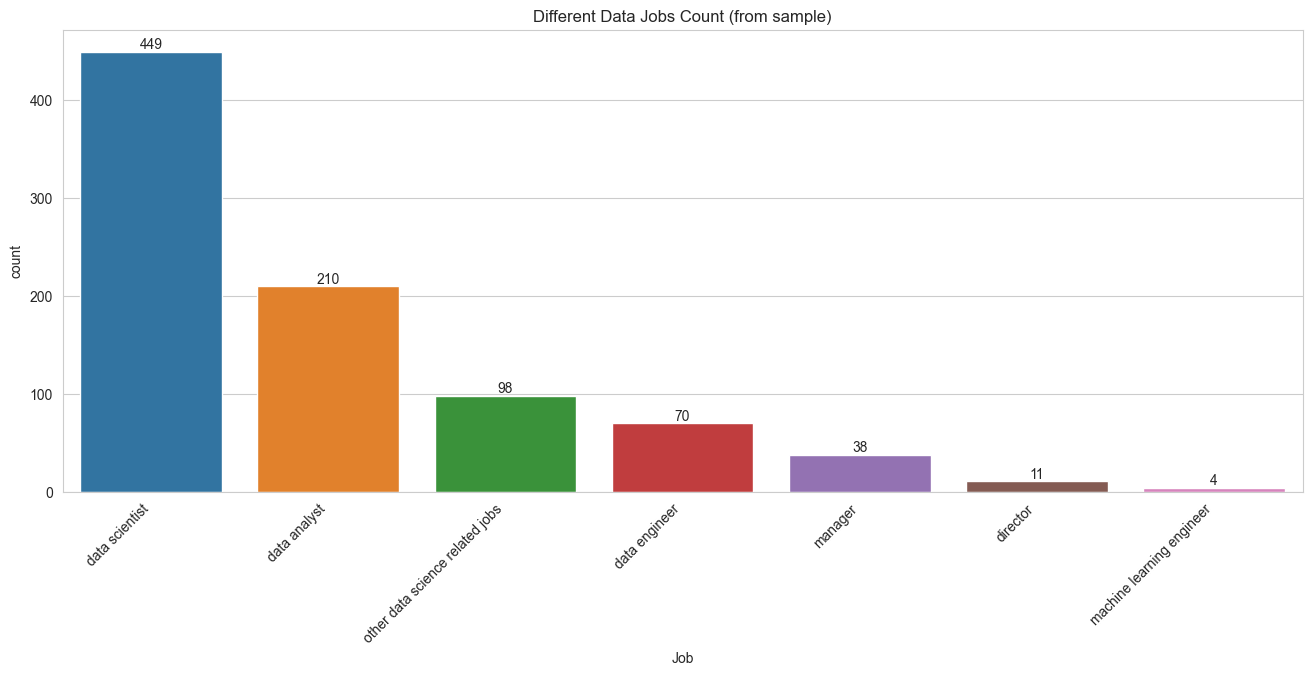

In [48]:
#Plotting Data on the available Different Data Jobs Counts in the sample
#set grid style
sns.set_style('whitegrid')

#set the width and height of the figure
plt.figure(figsize=(16,6))

#Title of chart
plt.title("Different Data Jobs Count (from sample)")

#Labels
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')

#Chart
chart = sns.countplot(x='Job',order = df['Job'].value_counts().index, data=df)
chart.bar_label(chart.containers[0])

In [49]:
#checking available seniority levels counts:
df['Seniority'].value_counts()

Not Specified    628
Senior           177
Junior            49
Mid               26
Name: Seniority, dtype: int64

[Text(0, 0, '628'), Text(0, 0, '177'), Text(0, 0, '49'), Text(0, 0, '26')]

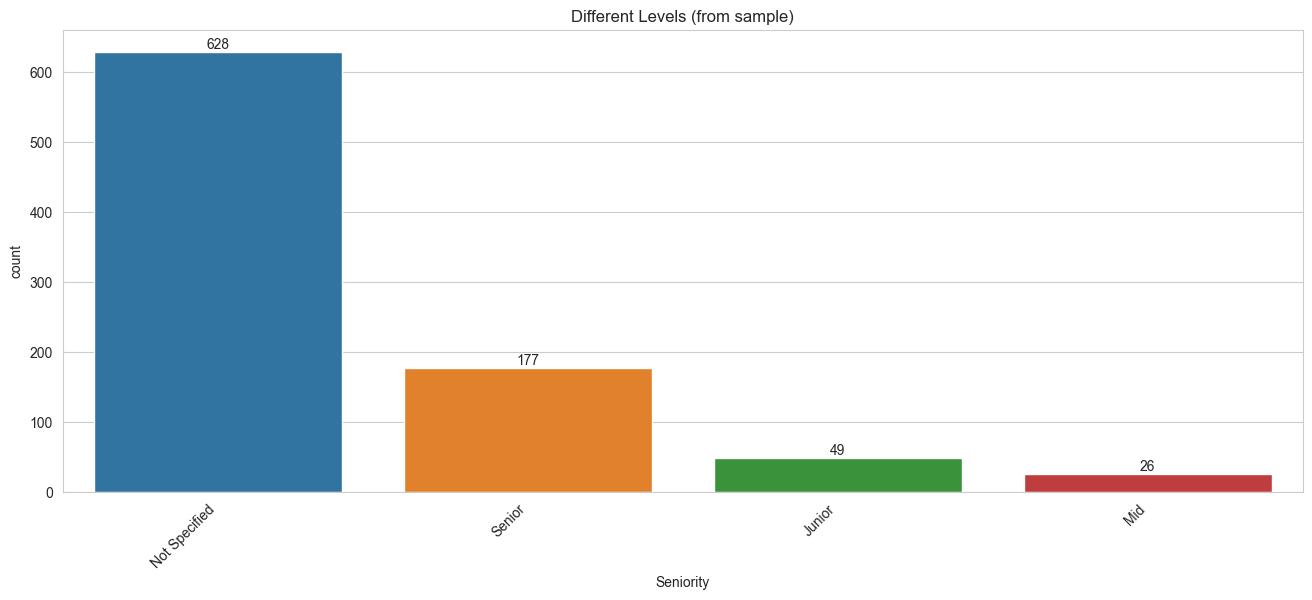

In [50]:
#Plotting the data on available different levels in the sample:
#Set grid style
sns.set_style('whitegrid')

# Set the width and height of the figure
plt.figure(figsize=(16,6))

#Title of chart
plt.title("Different Levels (from sample)")

#Labels
plt.xlabel('Seniority')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')

#Chart
chart = sns.countplot(x='Seniority',order = df['Seniority'].value_counts().index, data=df)
chart.bar_label(chart.containers[0])


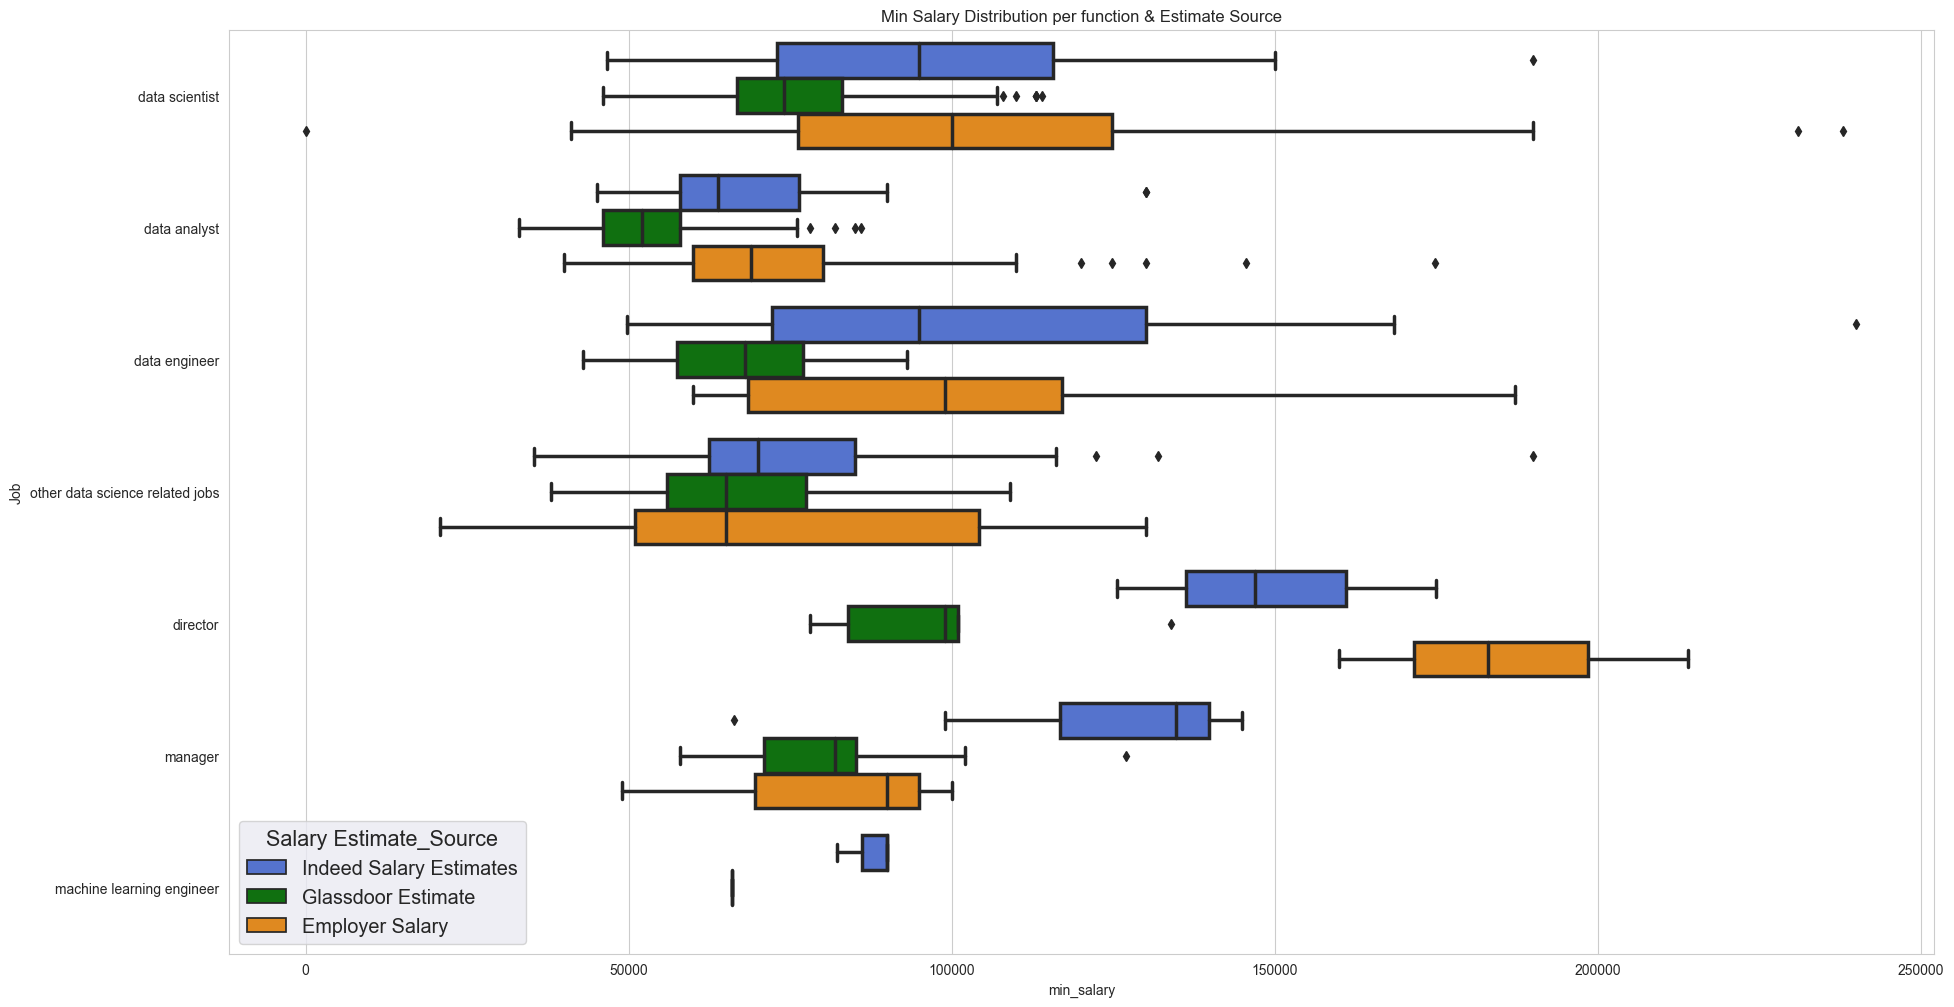

In [51]:
#Plotting the data on min salary distribution in the sample:
#Set grid style
sns.set_style('whitegrid')

# Set the width and height of the figure
plt.figure(figsize=(22,12))

#Title of chart
plt.title("Min Salary Distribution per function & Estimate Source")

#Labels
sns.set(font_scale=1.3)

#plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Jobs')
plt.ylabel('Min Salary')

#Color Palette
palette = {'Indeed Salary Estimates' : 'royalblue', 'Glassdoor Estimate':'green','Employer Salary':'darkorange'}

#Chart
chart = sns.boxplot(y="Job", x=df['min_salary'], hue="Salary Estimate_Source",
                 data=df, linewidth=2.5, 
                    palette = palette
                   )

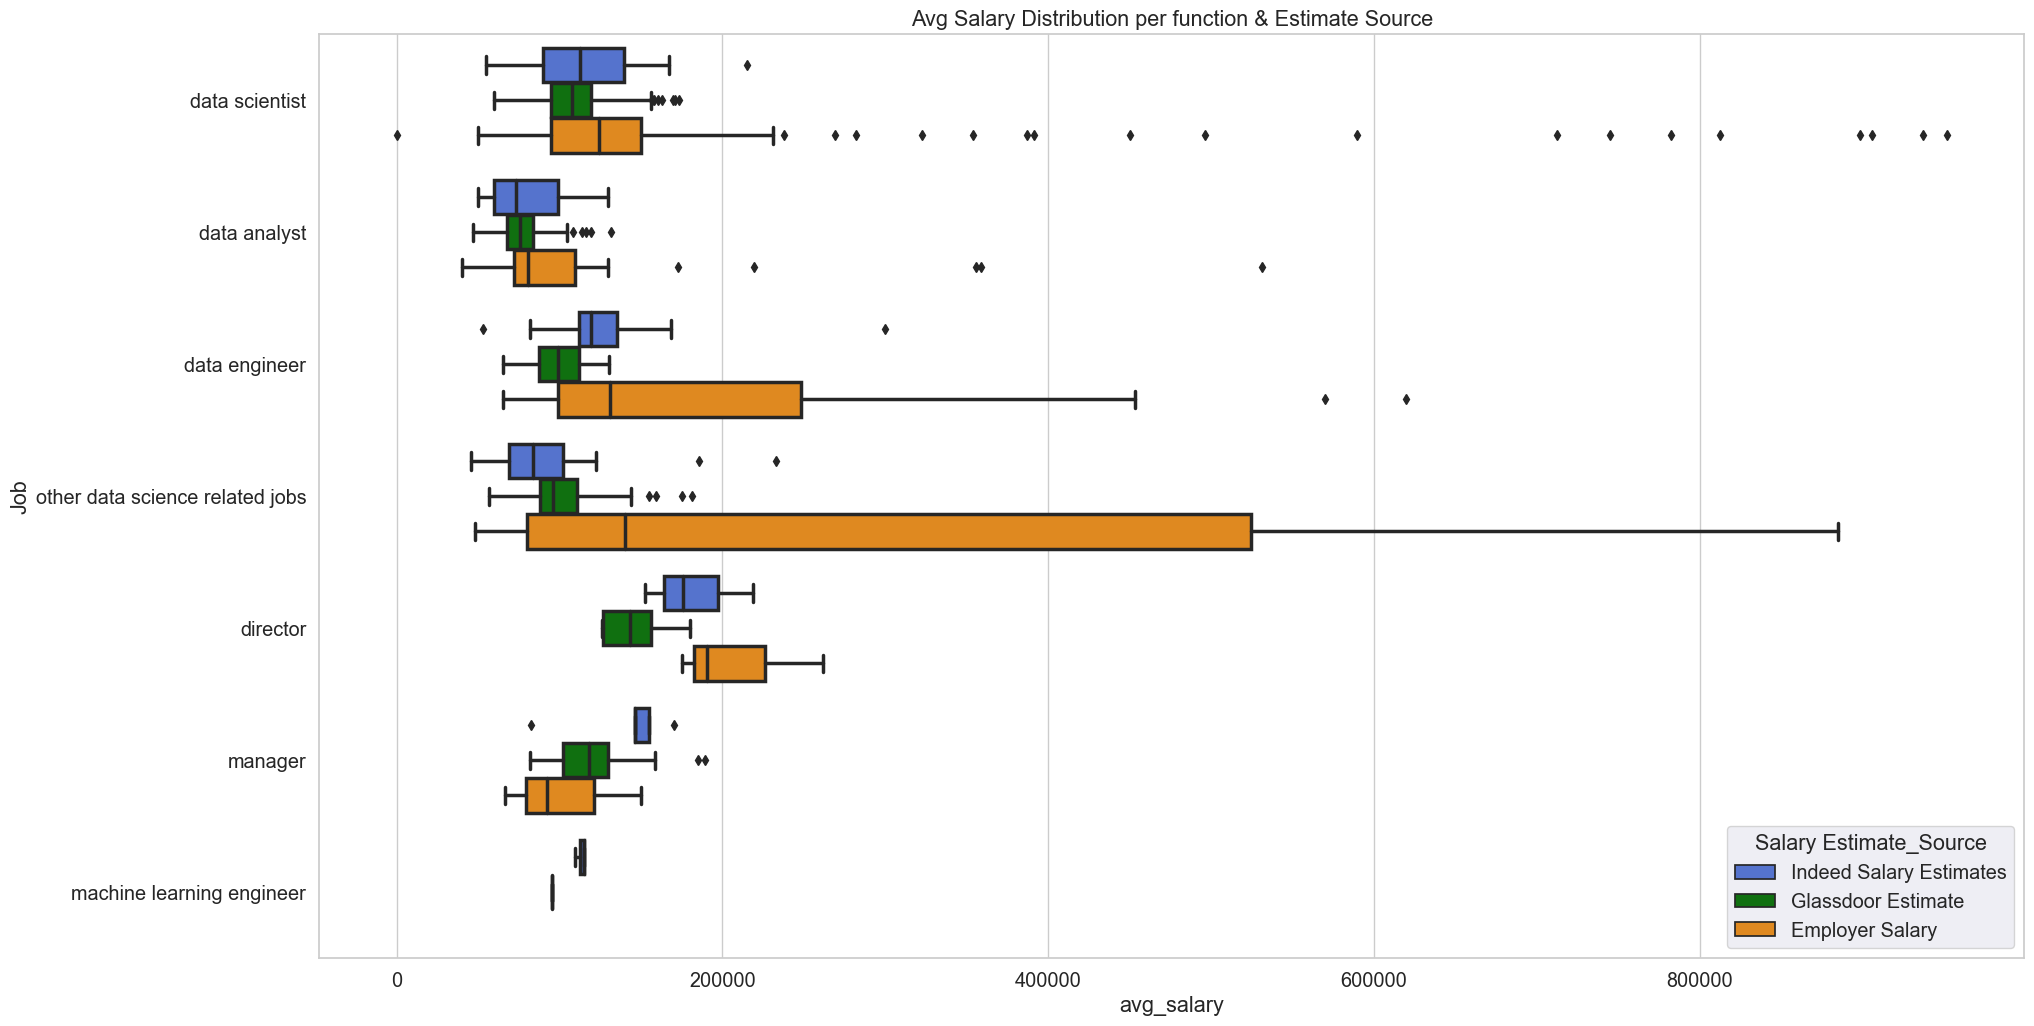

In [52]:
#Plotting the data on avg salary distribution in the sample:
#Set grid style
sns.set_style('whitegrid')

# Set the width and height of the figure
plt.figure(figsize=(22,12))

#Title of chart
plt.title("Avg Salary Distribution per function & Estimate Source")

#Labels
sns.set(font_scale=1.3)

#plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Jobs')
plt.ylabel('Avg Salary')

#Color Palette
palette = {'Indeed Salary Estimates' : 'royalblue', 'Glassdoor Estimate':'green','Employer Salary':'darkorange'}

#Chart
chart = sns.boxplot(y="Job", x=df['avg_salary'], hue="Salary Estimate_Source",
                 data=df, linewidth=2.5, 
                    palette = palette
                   )

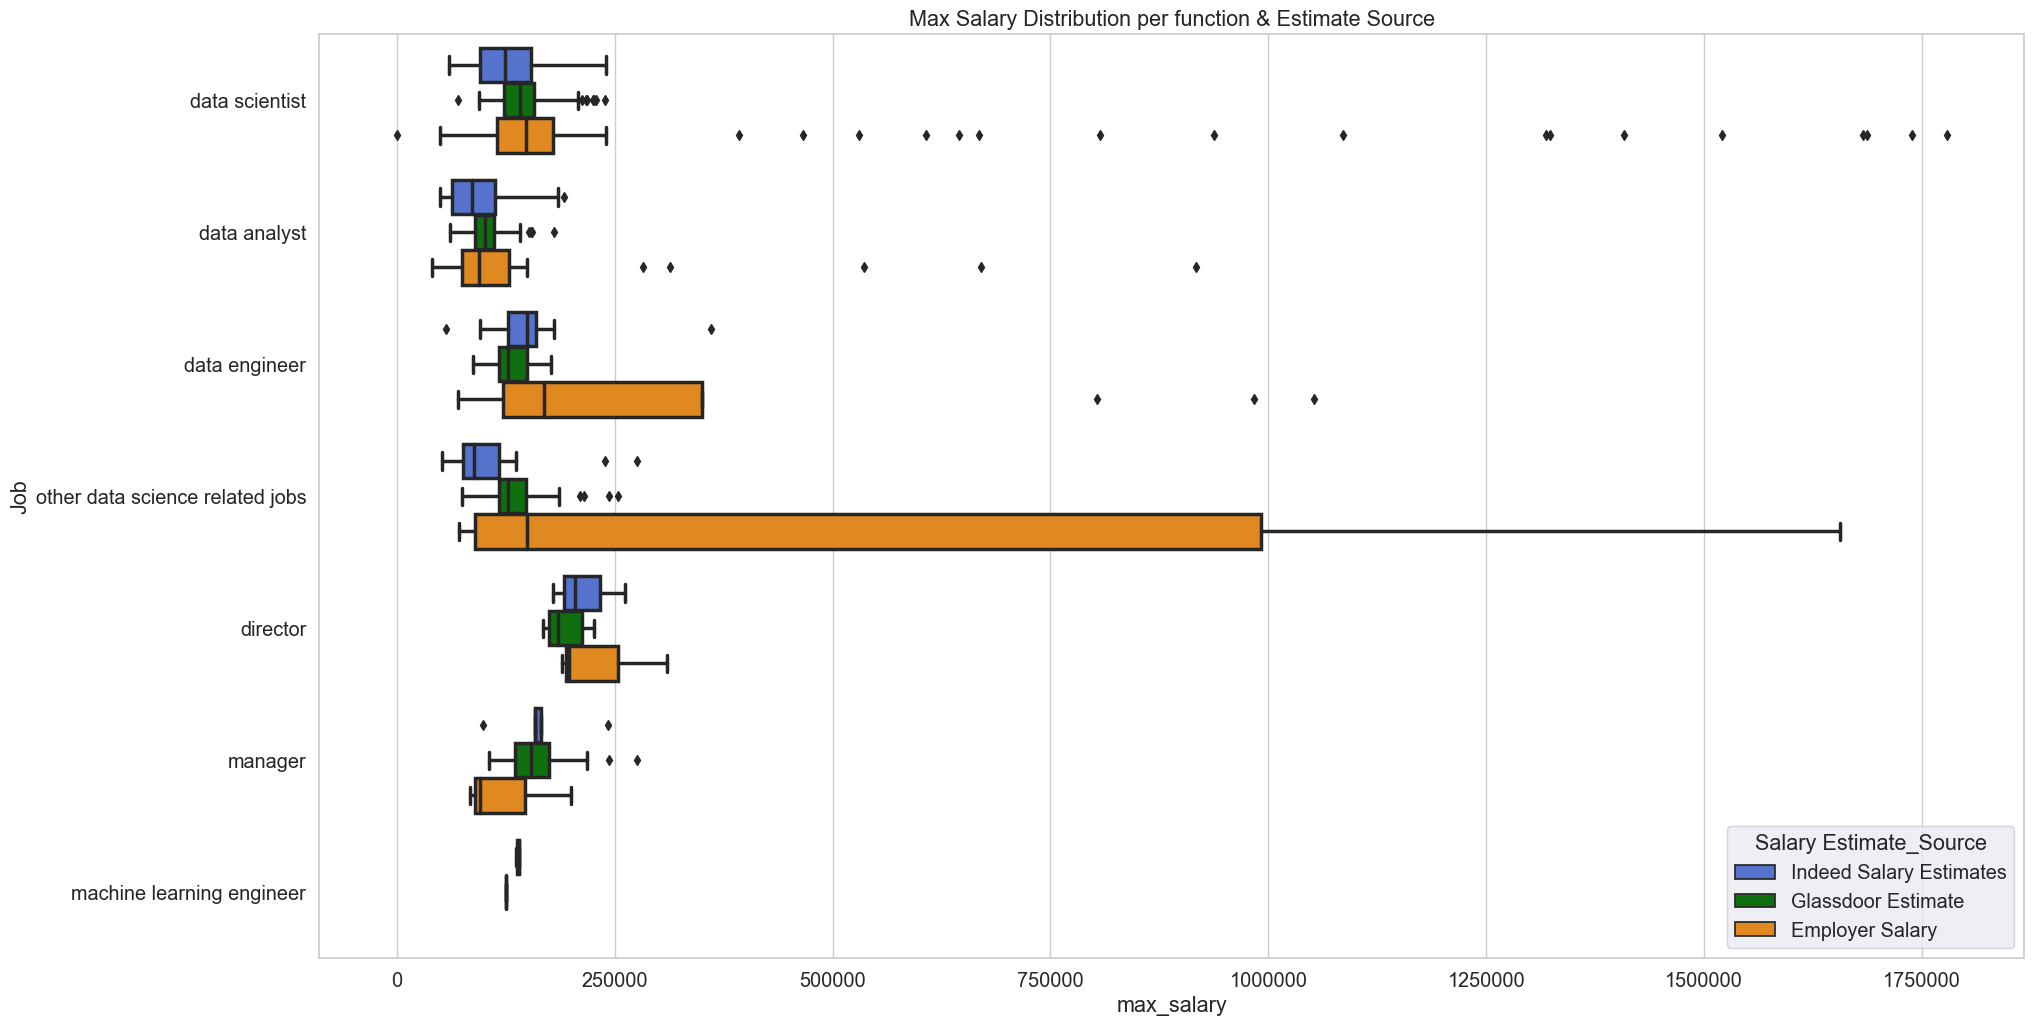

In [53]:
#Plotting the data on max salary distribution in the sample:
#Set grid style
sns.set_style('whitegrid')

# Set the width and height of the figure
plt.figure(figsize=(22,12))

#Title of chart
plt.title("Max Salary Distribution per function & Estimate Source")

#Labels
sns.set(font_scale=1.3)

#plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Jobs')
plt.ylabel('Max Salary')
plt.ticklabel_format(style='plain', axis='x')

#Color Palette
palette = {'Indeed Salary Estimates' : 'royalblue', 'Glassdoor Estimate':'green','Employer Salary':'darkorange'}

#Chart
chart = sns.boxplot(y="Job", x=df['max_salary'], hue="Salary Estimate_Source",
                 data=df, linewidth=2.5, 
                    palette = palette
                   )

<Figure size 1200x600 with 0 Axes>

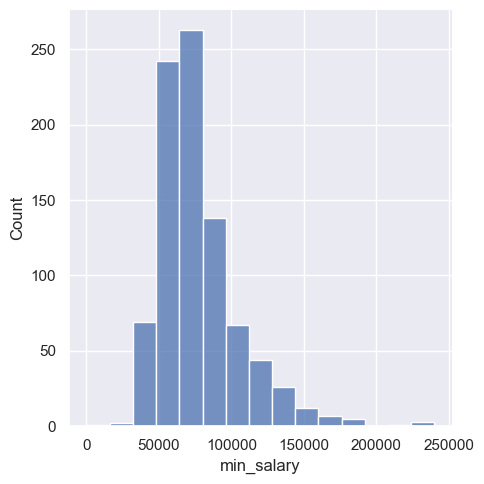

In [54]:
#Chceking the distribution count within the sample for each:
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
sns.displot(df['min_salary'], bins = 15)

<Figure size 1200x600 with 0 Axes>

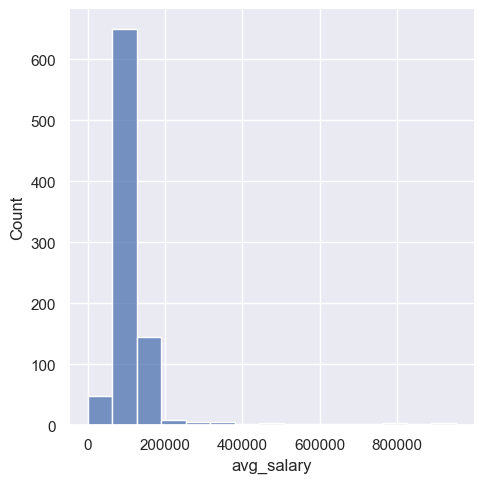

In [55]:
plt.figure(figsize=(12,6))
sns.displot(df['avg_salary'], bins = 15)

<Figure size 2000x1200 with 0 Axes>

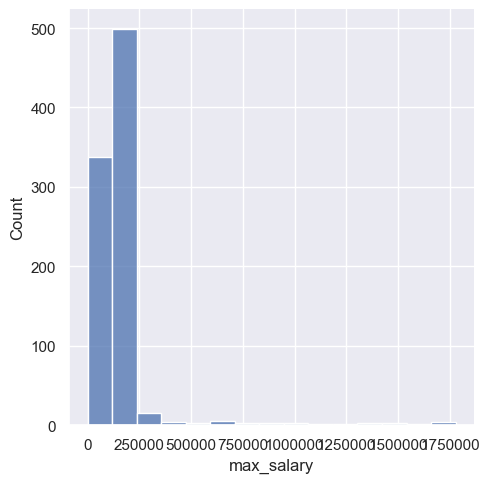

In [56]:
plt.figure(figsize=(20,12))
sns.displot(df['max_salary'], bins = 15)
plt.ticklabel_format(style='plain', axis='x')

In [57]:
#Creating a pivot table for salary estimate per job & seniority depending on the source:
pd.pivot_table(df, index = ['Salary Estimate_Source','Job','Seniority'], values = ['min_salary','max_salary','avg_salary']).sort_values('Salary Estimate_Source', ascending = False)

avg_salary  \
Salary Estimate_Source  Job                             Seniority                      
Indeed Salary Estimates other data science related jobs Senior         111041.333333   
                        data scientist                  Not Specified  100037.833333   
                        data analyst                    Mid             82157.000000   
                                                        Not Specified   83291.462500   
                                                        Senior          80889.666667   
                        data engineer                   Senior         157060.000000   
                        data scientist                  Junior          99500.000000   
                                                        Mid            117413.250000   
                        data engineer                   Not Specified  114937.600000   
                        data scientist                  Senior         146966.666667   
                        director                        Not Specified  182400.000000   
                        machine learning engineer       Not Specified  113200.000000   
                        manager                         Senior         143207.928571   
                        other data science related jobs Junior         109600.000000   
                                                        Not Specified   83681.046154   
Glassdoor Estimate      data scientist                  Not Specified  108760.465116   
                        other data science related jobs Senior         123250.000000   
                                                        Not Specified  100354.166667   
                                                        Junior          92500.000000   
                        manager                         Senior         121196.428571   
                        machine learning engineer       Not Specified   95500.000000   
                        director                        Senior         156000.000000   
                                                        Not Specified  143875.000000   
                        data scientist                  Senior         120444.444444   
                                                        Mid            123700.000000   
                        data engineer                   Senior         114500.000000   
                                                        Not Specified   99857.142857   
                                                        Mid            126500.000000   
                                                        Junior          90800.000000   
                        data analyst                    Senior          84979.166667   
                                                        Not Specified   76677.570093   
                                                        Mid             65000.000000   
                                                        Junior          77142.857143   
                        data scientist                  Junior          95291.666667   
Employer Salary         data analyst                    Not Specified   80310.434783   
                        data scientist                  Mid            124166.666667   
                        data analyst                    Senior         154742.222222   
                        data engineer                   Mid            453440.000000   
                                                        Not Specified  170371.111111   
                                                        Senior         346210.000000   
                        data scientist                  Junior          75500.000000   
                        other data science related jobs Junior         373360.000000   
                        data scientist                  Not Specified  187204.260638   
                                                        Senior         261420.000000   
                        di

In [58]:
#Creating a pivot table for salary estimate per job & seniority depending on the location/state data:
pd.pivot_table(df, index = ['State','Job','Seniority'], values = ['min_salary','max_salary','avg_salary']).sort_values('State', ascending = True)

avg_salary  \
State Job                             Seniority                      
AL    data analyst                    Not Specified   65500.000000   
      data scientist                  Not Specified  150000.000000   
      other data science related jobs Not Specified   94000.000000   
AR    data scientist                  Not Specified   93000.000000   
                                      Senior          89000.000000   
...                                                            ...   
WA    manager                         Senior         120166.666667   
      other data science related jobs Not Specified   90112.933333   
WI    data scientist                  Not Specified   73500.000000   
      data analyst                    Senior         531440.000000   
      other data science related jobs Not Specified   66000.000000   

                                                        max_salary  min_salary  
State Job                             Seniority                                 
AL    data analyst                    Not Specified   90000.000000     41000.0  
      data scientist                  Not Specified  200000.000000    100000.0  
      other data science related jobs Not Specified  132000.000000     56000.0  
AR    data scientist                  Not Specified  119000.000000     67000.0  
                                      Senior         118000.000000     60000.0  
...                                                            ...         ...  
WA    manager                         Senior         163333.333333     77000.0  
      other data science related jobs Not Specified  121126.666667     59099.2  
WI    data scientist                  Not Specified   89000.000000     58000.0  
      data analyst                    Senior         917280.000000    145600.0  
      other data science related jobs Not Specified   88000.000000     44000.0  

[224 rows x 3 columns]

[Text(0, 0, '145'),
 Text(0, 0, '128'),
 Text(0, 0, '96'),
 Text(0, 0, '46'),
 Text(0, 0, '41'),
 Text(0, 0, '40'),
 Text(0, 0, '37'),
 Text(0, 0, '36'),
 Text(0, 0, '30'),
 Text(0, 0, '24'),
 Text(0, 0, '23'),
 Text(0, 0, '23'),
 Text(0, 0, '22'),
 Text(0, 0, '22'),
 Text(0, 0, '21'),
 Text(0, 0, '20'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

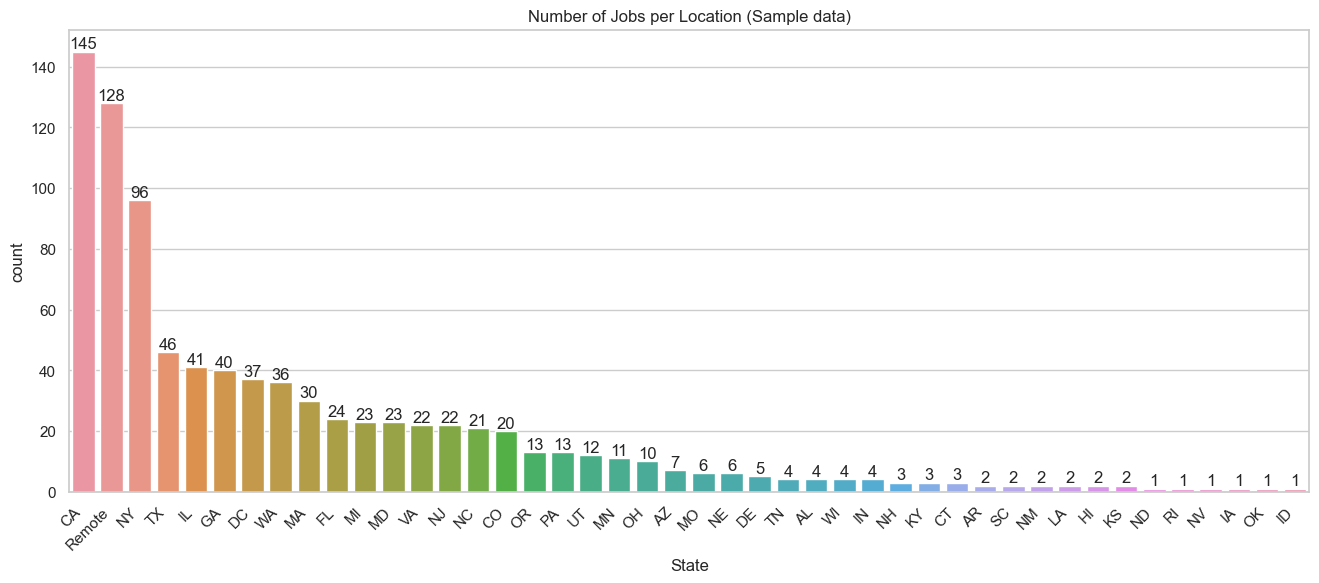

In [59]:
#Plotting number of jobs per location within the sample:
#Set grid style
sns.set_style('whitegrid')

# Set the width and height of the figure
plt.figure(figsize=(16,6))

#Title of chart
plt.title("Number of Jobs per Location (Sample data)")

#Labels
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')

#Chart
chart = sns.countplot(x='State', order = df['State'].value_counts().index ,data=df)
chart.bar_label(chart.containers[0])

## ML Model:

In [60]:
#checking all available columns
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Salary Estimate',
       'Job Description', 'Data Source', 'Salary Estimate_Source', 'Job',
       'Seniority', 'City', 'State', 'Salary Estimates', 'min_salary',
       'max_salary', 'Salary Type_initial', 'Salary Type_final', 'avg_salary',
       'Python', 'R', 'SQL', 'AWS', 'GCP', 'Azure', 'Docker', 'Spark',
       'Airflow', 'PyTorch', 'TensorFlow', 'Keras', 'Tableau', 'Power BI',
       'Excel'],
      dtype='object')

In [61]:
#Choosing relevant columns
df_model = df[['State','Job','Seniority','avg_salary']]

In [62]:
#ML preprocessing - Label Encoder
from sklearn.preprocessing import LabelEncoder
el_job = LabelEncoder()
df_model['Job'] = el_job.fit_transform(df_model['Job'])
df_model["Job"].unique()

array([2, 0, 1, 6, 3, 5, 4])

In [63]:
el_seniority = LabelEncoder()
df_model['Seniority'] = el_seniority.fit_transform(df_model['Seniority'])
df_model["Seniority"].unique()

array([1, 2, 0, 3])

In [64]:
el_state = LabelEncoder()
df_model['State'] = el_state.fit_transform(df_model['State'])
df_model["State"].unique()

array([36,  3, 23,  6, 19, 30, 42, 40,  4, 20,  2, 22, 39,  9, 33, 34, 13,
       27, 18, 21, 41, 26, 31,  8, 17,  7, 25, 35,  0, 43, 14, 24,  5,  1,
       37, 28, 16, 38, 10, 29, 11, 15, 32, 12])

In [65]:
#dummy_data
df_dummy = pd.get_dummies(df_model)

In [66]:
#Train_test_split
from sklearn.model_selection import train_test_split

X = df_dummy.drop(['avg_salary'], axis =1)
y = df_dummy['avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X

,State,Job,Seniority
0,36,2,1
2,36,0,1
3,36,1,2
4,36,6,2
5,36,2,2
...,...,...,...
890,12,5,3
891,39,0,2
892,30,2,2
893,42,2,2


In [68]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

print(model.fit().summary())
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)

print(cross_val_score(lr,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
np.mean(cross_val_score(lr,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.127
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           0.000400
Time:                        17:06:39   Log-Likelihood:                -11344.
No. Observations:                 880   AIC:                         2.270e+04
Df Residuals:                     876   BIC:                         2.272e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.704e+04   1.21e+04      6.379      0.0

-39164.40486875575

,alpha,error
0,0.01,-39164.405138


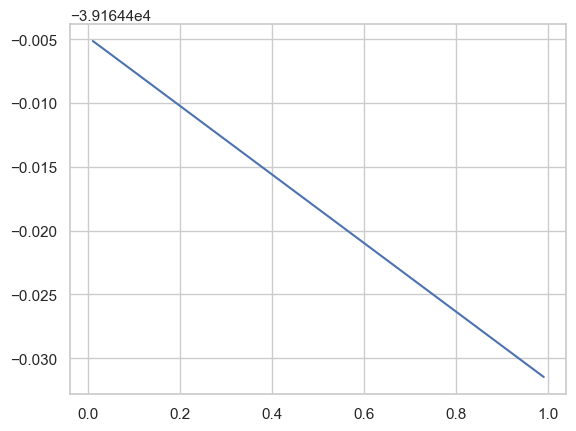

In [69]:
# lasso regression 
lr_l = Lasso(alpha=.13)
lr_l.fit(X_train,y_train)
np.mean(cross_val_score(lr_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [70]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

print(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

[-40709.6531571  -48128.68973886 -36652.3668702 ]


-42224.649351138134

In [71]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


C:\Users\Oussama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Oussama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Oussama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 a

RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=20)

In [72]:
# test ensembles 
tpred_lr = lr.predict(X_test)
tpred_lr_l = lr_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

print(tpred_lr)
print(tpred_lr_l)
print(tpred_rf)

[113300.20058961 141351.14164156 105729.98154854  89616.56217574
 119249.40137108 139685.88179193 118920.26141278 119249.40137108
 120236.82124601 145300.82114125 113300.20058961 112995.74216325
 139356.74183362 101819.42216506 114299.9612305  125824.9812451
 112641.92067299 111350.04237171 126141.78043743 141673.06230774
  96192.14204976 104084.281757   124186.50074569 109679.66104823
 111654.50079807 106071.46227282 120558.74191218 120863.20033854
 109362.86185589 122211.66099585 115267.82104732 109679.66104823
 113629.34054791 112641.92067299 123857.36078739 111976.42146425
 122211.66099585 107046.54138177 122533.58166203 101819.42216506
 114641.44195478 131420.36053632 100792.88217393 100792.88217393
 120863.20033854  92932.64329076 142002.20226605 109679.66104823
 112995.74216325 111350.04237171 141351.14164156 120236.82124601
 122508.90013008 100792.88217393 132464.36276727 139047.16193341
 113629.34054791 102141.34283124 112641.92067299 116616.28170463
 123199.08087077 119313.20

In [73]:
#diagnosis of the model
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lr))
print(mean_absolute_error(y_test,tpred_lr_l))
print(mean_absolute_error(y_test,tpred_rf))

mean_absolute_error(y_test,(tpred_lr+tpred_rf)/2)


43633.58366044852
43633.604593977405
39270.185156249994


39316.879667064786

In [74]:
X = np.array([["data analyst", 'Junior', 'Remote']])
X

array([['data analyst', 'Junior', 'Remote']], dtype='<U12')

In [75]:
X[:, 0] = el_job.transform(X[:,0])
X[:, 1] = el_seniority.transform(X[:,1])
X[:, 2] = el_state.transform(X[:,2])
X = X.astype(float)
X

array([[ 0.,  0., 36.]])

In [76]:
y_pred = gs.predict(X)
y_pred

C:\Users\Oussama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([70012.5])

In [338]:
#exporting the model to file
import pickle
pickl = {"model": gs.best_estimator_, "el_job" : el_job, "el_seniority" : el_seniority, "el_state" : el_state}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [339]:
with open('model_file.p', 'rb') as file:
    pickl = pickle.load(file)

predictor_loaded = pickl["model"]
el_job = pickl["el_job"]
el_seniority = pickl["el_seniority"]
el_state = pickl["el_state"]

In [340]:
#Test:
y_pred = predictor_loaded.predict(X)
y_pred

array([67550.])